In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(45)

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [3]:
data_path = r'C:\Users\DucTRung\Desktop\country_by_freedom_indexes_in_covid19\wrangled_frame'

In [4]:
df = pd.read_csv(data_path + "\\wrangled_f_3.csv")

In [5]:
df

,country,region,continent,bri_country,bri_member_income_group,total_cases,total_deaths,total_recovered,total_tests,active_cases,serious_critical,cases_over_1_m,deaths_over_1_m,tests_over_1_m,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
0,USA,Northern America,Northern America,non_member,NaN,588465.0,23711.0,37326.000000,2961818.0,527428.0,12772.0,1778.00,72.00,8948.0,79.11,68.92,69.0,79.6,76.8,74.31
1,Spain,Southern Europe,Europe,non_member,NaN,172541.0,18056.0,67504.000000,600000.0,86981.0,7371.0,3690.00,386.00,12833.0,83.99,63.54,62.0,82.9,65.7,78.01
2,Italy,Southern Europe,Europe,bri_member,High income,159516.0,20465.0,35435.000000,1046910.0,103616.0,3260.0,2638.00,338.00,17315.0,84.01,62.23,53.0,75.2,62.2,75.02
3,France,Western Europe,Europe,non_member,NaN,136779.0,14967.0,27718.000000,333807.0,94094.0,6821.0,2095.00,229.00,5114.0,83.13,65.92,69.0,81.2,63.8,77.79
4,Germany,Western Europe,Europe,non_member,NaN,130434.0,3220.0,68200.000000,1317887.0,59014.0,4288.0,1557.00,38.00,15730.0,81.88,69.85,80.0,86.8,73.5,85.40
5,UK,Northern Europe,Europe,non_member,NaN,93873.0,12107.0,2446.244681,382650.0,81422.0,1559.0,1383.00,178.00,5637.0,81.77,70.54,77.0,85.2,78.9,77.77
6,China,Eastern Asia,Asia,bri_member,Upper middle income,82249.0,3341.0,77738.000000,unknown,1170.0,116.0,57.00,2.00,unknown,77.47,51.91,41.0,22.6,58.4,21.08
7,Iran,Southern Asia,Asia,bri_member,Upper middle income,74877.0,4683.0,48129.000000,287359.0,22065.0,3691.0,891.00,56.00,3421.0,77.33,45.48,26.0,23.8,51.1,35.59
8,Turkey,Western Asian,Asia,bri_member,Upper middle income,61049.0,1296.0,3957.000000,410556.0,55796.0,1786.0,724.00,15.00,4868.0,78.45,53.73,39.0,40.9,64.6,47.19
9,Belgium,Western Europe,Europe,non_member,NaN,31119.0,4157.0,6868.000000,102151.0,20094.0,1223.0,2685.00,359.00,8814.0,82.17,69.23,75.0,76.4,67.3,87.93


# by Country

In [6]:
case_country_f = df[['country', 'total_casess']].sort_values(by='total_casess', ascending=False).set_index('country')

## Top 10 countries

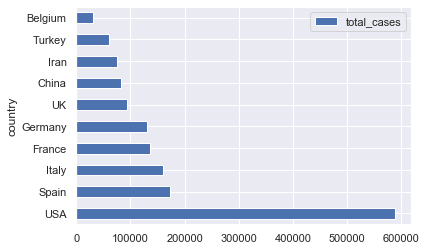

In [7]:
case_country_f[:10].plot(kind='barh')

## 80% death of the world

In [9]:
case_country_f['relative_fre'] = case_country_f['total_casess'] / case_country_f['total_casess'].sum() * 100

In [10]:
case_country_f['cum_fre'] = case_country_f['relative_fre'].cumsum()

In [11]:
case_country_f

,total_cases,relative_fre,cum_fre
country,,,
USA,588465.0,30.242023,30.242023
Spain,172541.0,8.867118,39.109141
Italy,159516.0,8.197746,47.306887
France,136779.0,7.029260,54.336147
Germany,130434.0,6.703182,61.039329
UK,93873.0,4.824262,65.863591
China,82249.0,4.226889,70.090480
Iran,74877.0,3.848032,73.938511
Turkey,61049.0,3.137392,77.075903


In [12]:
case_country_f[:11].index

Index(['USA', 'Spain', 'Italy', 'France', 'Germany', 'UK', 'China', 'Iran',
       'Turkey', 'Belgium', 'Netherlands'],
      dtype='object', name='country')

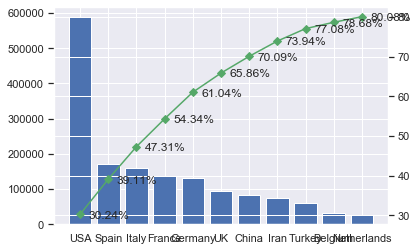

In [14]:
fig, ax1 = plt.subplots()

ax1.bar(data=case_country_f[:11], x=case_country_f[:11].index, height='total_casess')

ax2 = ax1.twinx()
ax2.plot(case_country_f[:11].index, case_country_f[:11]['cum_fre'], color='g', marker='D')
for i, j in enumerate(case_country_f[:11]['cum_fre']):
    ax2.text(i+.3, j-1, s=str(round(j, 2))+'%')

# by Region

In [15]:
def stats(group):
    return {'count': group.count(),
            'sum': group.sum(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min(),
            'std': group.std()}

In [18]:
case_region_f = df['total_cases'].groupby(df['region']).apply(stats).unstack()

In [19]:
case_region_f['CoV'] = round(case_region_f['std'] / case_region_f['mean'], 2)

In [20]:
case_region_f

,count,sum,mean,median,max,min,std,CoV
region,,,,,,,,
Australia & New Zealand,2.0,7766.0,3883.000000,3883.0,6400.0,1366.0,3559.575536,0.92
Caribbean,16.0,4847.0,302.937500,60.5,3286.0,12.0,814.022970,2.69
Central America,8.0,9848.0,1231.000000,287.0,5014.0,9.0,1914.709228,1.56
Central Asia,3.0,2745.0,915.000000,1113.0,1202.0,430.0,422.373058,0.46
Eastern Africa,19.0,2136.0,112.421053,54.0,391.0,4.0,126.405571,1.12
Eastern Asia,7.0,101939.0,14562.714286,1013.0,82249.0,30.0,30143.039919,2.07
Eastern Europe,10.0,52736.0,5273.600000,3326.5,21102.0,713.0,6057.812187,1.15
Melanesia,3.0,36.0,12.000000,16.0,18.0,2.0,8.717798,0.73
Middle Africa,9.0,1284.0,142.666667,23.0,848.0,4.0,274.389778,1.92


## Top

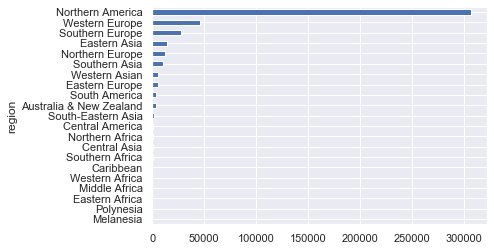

In [21]:
case_region_f.sort_values(by='mean')['mean'].plot(kind='barh')

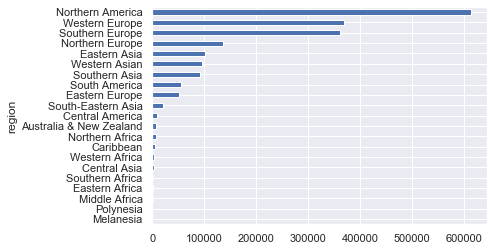

In [22]:
case_region_f.sort_values(by='sum')['sum'].plot(kind='barh')

# by Continent

In [23]:
case_continent_stats_t = df['total_cases'].groupby(df['continent']).apply(stats).unstack()

In [24]:
case_continent_stats_t['CoV'] = round(case_continent_stats_t['std'] / case_continent_stats_t['mean'], 2)

In [25]:
case_continent_stats_t

,count,sum,mean,median,max,min,std,CoV
continent,,,,,,,,
Africa,55.0,16306.0,296.472727,57.0,2415.0,4.0,554.296947,1.87
Asia,48.0,315346.0,6569.708333,1012.5,82249.0,1.0,17656.887661,2.69
Europe,42.0,922253.0,21958.404762,3286.5,172541.0,79.0,45099.574091,2.05
Latin America and Caribbean,37.0,69945.0,1890.405405,149.0,23955.0,9.0,4452.206672,2.36
Northern America,2.0,614145.0,307072.500000,307072.5,588465.0,25680.0,397949.089850,1.30
Oceania,6.0,7857.0,1309.500000,36.5,6400.0,2.0,2551.110484,1.95


## Top

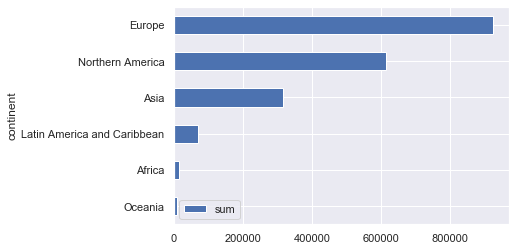

In [26]:
case_continent_stats_t[['sum']].sort_values(by='sum').plot(kind='barh')

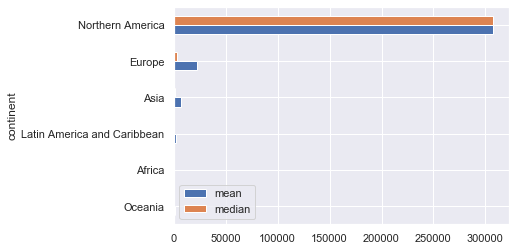

In [27]:
case_continent_stats_t[['mean', 'median']].sort_values(by='median').plot(kind='barh')

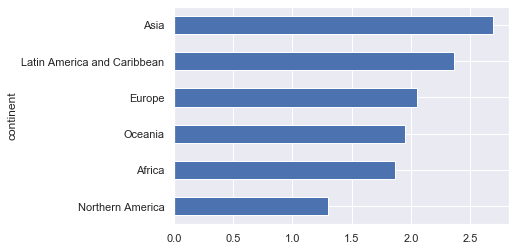

In [28]:
case_continent_stats_t['CoV'].sort_values().plot(kind='barh')

# by BRI-membership

In [29]:
pd.crosstab(df['bri_country'], df['continent'], margins=True)

continent,Africa,Asia,Europe,Latin America and Caribbean,Northern America,Oceania,All
bri_country,,,,,,,
bri_member,42,37,25,18,0,3,125
non_member,13,11,17,19,2,3,65
All,55,48,42,37,2,6,190


In [30]:
case_bri_stats_t = df['total_cases'].groupby(df['bri_country']).apply(stats).unstack()

In [31]:
case_bri_stats_t['CoV'] = round(case_bri_stats_t['std'] / case_bri_stats_t['mean'], 2)

In [32]:
case_bri_stats_t

,count,sum,mean,median,max,min,std,CoV
bri_country,,,,,,,,
bri_member,125.0,591821.0,4734.568000,548.0,159516.0,1.0,18063.375713,3.82
non_member,65.0,1354031.0,20831.246154,391.0,588465.0,4.0,78736.286120,3.78


## each Continent

### Sum

In [33]:
case_bri_con_sum_t = pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_cases'],
               columns=['continent'],
               aggfunc=np.sum,
               margins=True)

In [34]:
row_f = pd.DataFrame([case_bri_con_sum_t.loc['bri_member'] / case_bri_con_sum_t.loc['non_member']])
case_bri_con_sum_t = pd.concat([case_bri_con_sum_t, row_f])
case_bri_con_sum_t.rename({0: 'bri / non'}, axis='index', inplace=True)

In [35]:
case_bri_con_sum_t

total_cases                                ...                                            
continent         Africa           Asia         Europe  ... Northern America      Oceania           All
bri_member  14481.000000  282678.000000  262087.000000  ...              NaN  1384.000000  5.918210e+05
non_member   1825.000000   32668.000000  660166.000000  ...         614145.0  6473.000000  1.354031e+06
All         16306.000000  315346.000000  922253.000000  ...         614145.0  7857.000000  1.945852e+06
bri / non       7.934795       8.653055       0.397002  ...              NaN     0.213811  4.370808e-01

[4 rows x 7 columns]

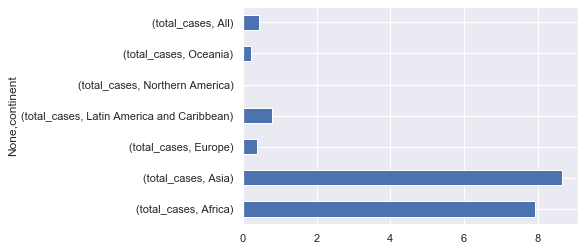

In [36]:
case_bri_con_sum_t.loc['bri / non'].plot(kind='barh')

### Mean

In [37]:
case_bri_con_mean_t = pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_cases'],
               columns=['continent'],
               aggfunc=np.mean)

In [38]:
row_f = pd.DataFrame([case_bri_con_mean_t.loc['bri_member'] / case_bri_con_mean_t.loc['non_member']])
case_bri_con_mean_t = pd.concat([case_bri_con_mean_t, row_f])
case_bri_con_mean_t.rename({0: 'bri / non'}, axis='index', inplace=True)

In [39]:
case_bri_con_mean_t

total_cases                                                                                     
continent       Africa         Asia        Europe Latin America and Caribbean Northern America      Oceania
bri_member  344.785714  7639.945946  10483.480000                 1732.833333              NaN   461.333333
non_member  140.384615  2969.818182  38833.294118                 2039.684211         307072.5  2157.666667
bri / non     2.456008     2.572530      0.269961                    0.849560              NaN     0.213811

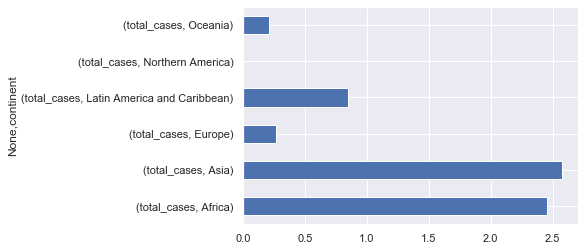

In [40]:
case_bri_con_mean_t.loc['bri / non'].plot(kind='barh')

### Median

In [41]:
pd.pivot_table(data=df,
                index=['bri_country'],
               values=['total_cases'],
               columns=['continent'],
               aggfunc=np.median)

total_cases                                                                      
continent        Africa    Asia   Europe Latin America and Caribbean Northern America Oceania
bri_country                                                                                  
bri_member         59.5  1113.0   1934.0                       169.0              NaN    16.0
non_member         34.0   393.0  10647.0                       145.0         307072.5    55.0

### Get total deaths each continent by bri_membership

In [42]:
def get_(group, key):
    totals = group.groupby(key)['total_cases'].sum()
    return totals.sort_values(ascending=False)

In [43]:
df.groupby('bri_country').apply(get_, 'continent')

bri_country  continent                  
bri_member   Asia                           282678.0
             Europe                         262087.0
             Latin America and Caribbean     31191.0
             Africa                          14481.0
             Oceania                          1384.0
non_member   Europe                         660166.0
             Northern America               614145.0
             Latin America and Caribbean     38754.0
             Asia                            32668.0
             Oceania                          6473.0
             Africa                           1825.0
Name: total_cases, dtype: float64

### Percentage of total deaths by Bri-membership for each death size

In [50]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000])

In [51]:
labels = pd.cut(df['total_cases'], bins)

In [52]:
grouped = df.groupby(['bri_country', labels])

In [53]:
bucket_sum = grouped['total_cases'].sum().unstack(0)

In [54]:
normed_sum = bucket_sum.div(bucket_sum.sum(axis=1), axis=0)

In [55]:
normed_sum

bri_country,bri_member,non_member
total_cases,,
"(0, 10]",0.692308,0.307692
"(10, 100]",0.634946,0.365054
"(100, 1000]",0.711098,0.288902
"(1000, 10000]",0.743083,0.256917
"(10000, 100000]",0.508113,0.491887
"(100000, 1000000]",0.134303,0.865697


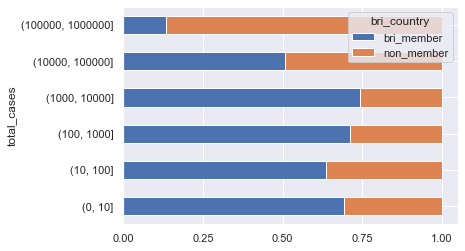

In [56]:
normed_sum.plot(kind='barh', stacked=True, xticks=[.0, .25, .5, .75, 1])

# by Freedom Indexes

In [57]:
case_index_f = df[['total_cases', 'life_expectancy_index_2019', 'happiness_index_2019',
       'corruption_perception_index_2019', 'democracy_index_2019',
       'economic_freedom_index_2019', 'press_freedom_index_2019', 'region', 'country', 'bri_country', 'continent']]

## by Country

In [58]:
case_index_f.corr()['total_cases']

total_cases                         1.000000
life_expectancy_index_2019          0.190444
happiness_index_2019                0.222120
corruption_perception_index_2019    0.217441
democracy_index_2019                0.185828
economic_freedom_index_2019         0.169412
press_freedom_index_2019            0.087181
Name: total_cases, dtype: float64

In [59]:
by_country = case_index_f.set_index('country')

In [60]:
by_country.loc[['USA', 'Spain', 'Italy', 'France', 'Germany', 'UK', 'China', 'Iran',
       'Turkey', 'Belgium', 'Netherlands']].corr()['total_cases']

total_cases                         1.000000
life_expectancy_index_2019         -0.108164
happiness_index_2019                0.190471
corruption_perception_index_2019    0.129182
democracy_index_2019                0.227100
economic_freedom_index_2019         0.315484
press_freedom_index_2019            0.119687
Name: total_cases, dtype: float64

## by Region

In [61]:
by_region = case_index_f.set_index('region').groupby('region')

In [62]:
case_corr = lambda x: x.corrwith(x['total_cases'])

In [63]:
rec_ind_byreg_corr_t = by_region.apply(case_corr)

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [64]:
rec_ind_byreg_corr_t

,total_cases,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
region,,,,,,,
Australia & New Zealand,1.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Caribbean,1.0,-0.030079,0.332961,-0.458400,0.121633,-0.145105,-0.092530
Central America,1.0,0.217262,0.205483,0.024059,0.319051,0.640474,-0.316796
Central Asia,1.0,0.621020,0.870814,0.041479,-0.910024,1.000000,-0.991350
Eastern Africa,1.0,0.690013,0.711283,0.473591,0.330269,0.332578,-0.119318
Eastern Asia,1.0,-0.241389,-0.484960,-0.467514,-0.882807,-0.469376,-0.980845
Eastern Europe,1.0,-0.193671,0.160604,-0.312518,-0.495123,-0.110670,-0.481090
Melanesia,1.0,0.742527,NaN,NaN,-1.000000,1.000000,-1.000000
Middle Africa,1.0,-0.094315,0.489595,-0.179518,0.076839,0.216634,-0.091118


* life_expectancy_index_2019: 
 / Northern America           -1 
 / Southern Europe            0.538517
 / Eastern Africa             0.687704
 / Melanesia                  0.980408
 / Central Asia               0.986941
 / Australia & New Zealand    1.000000
 
* happiness_index_2019: 
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Southern Africa            0.546437
 
* corruption_perception_index_2019:
 / Eastern Africa             0.643983
 / Central Asia               0.703606
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Southern Africa           -0.851903
 
* democracy_index_2019:
 / South-Eastern Asia         0.531530
 / Australia & New Zealand   -1.000000
 / Northern America          -1.000000
 / Eastern Asia              -0.905688
 / Southern Asia             -0.626543
 
* economic_freedom_index_2019:
South-Eastern Asia         0.541399
Central Asia               1.000000
Australia & New Zealand   -1.000000
Northern America          -1.000000
Caribbean                 -0.515860

* press_freedom_index_2019:
Australia & New Zealand   -1.000000
Northern America          -1.000000
Eastern Asia              -0.984323
Southern Asia             -0.777677
Central Asia              -0.644376
Caribbean                 -0.507486

## by BRI-membership

In [65]:
by_bri = case_index_f.groupby('bri_country')

In [66]:
case_corr = lambda x: x.corrwith(x['total_cases'])

In [67]:
by_bri.apply(case_corr)

,total_cases,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
bri_country,,,,,,,
bri_member,1.0,0.254040,0.138115,0.085971,0.018379,0.052262,-0.119765
non_member,1.0,0.165154,0.213852,0.223335,0.218524,0.203503,0.134099


## by Continent

In [68]:
by_continent = case_index_f.groupby('continent')

In [69]:
by_continent.apply(case_corr)

,total_cases,life_expectancy_index_2019,happiness_index_2019,corruption_perception_index_2019,democracy_index_2019,economic_freedom_index_2019,press_freedom_index_2019
continent,,,,,,,
Africa,1.0,0.313414,0.338106,0.255754,0.194788,0.095892,0.008521
Asia,1.0,0.149560,-0.008663,-0.043841,-0.176702,-0.120183,-0.386272
Europe,1.0,0.387484,0.196556,0.213534,0.210094,-0.006134,0.111957
Latin America and Caribbean,1.0,0.141573,0.186575,-0.075731,0.248837,0.022865,-0.044479
Northern America,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Oceania,1.0,0.604412,-1.000000,0.538257,0.710102,0.652997,0.479692
